In [50]:
## approach 1
from sage.all import parent, ZZ, vector, PolynomialRing, GF
from sage.all import log, ceil, randint, set_random_seed, random_vector, matrix, floor
import matplotlib.pyplot as plt
import time
import random

#Kyber Parameters
n = 256
q = 3329
eta1 = 2
eta2 = 2
du = 10
dv = 4
k = 3
R, x = PolynomialRing(ZZ, "x").objgen()
f = R([1]+[0]*(n-1)+[1])
iterations_list =  [10, 100, 1000, 10000]


def compress(coeff, d):
    return round(coeff * (2**d)/q) #% (2**d )

def decompress(coeff, d):
    return round(coeff * q /(2**d))

psi4, psi10 = [], []
for i in range(0, q):
    psi4.append(i - decompress(compress(i,4),4))
    psi10.append(i - decompress(compress(i,10),10))

def psi(d):
    if d == 4:
        return random.choice(psi4)
    if d == 10:
        return random.choice(psi10)
    
def B(eta):
    r = 0
    for i in range(eta):
        r += randint(0, 1) - randint(0, 1)
    return r

def find_mean_variance(q):
    no_of_samples = sum(q.values())
    expected, variance = 0,0
    
    for k,v in q.items():
        expected += k*v / no_of_samples

    for k,v in q.items():
        variance += (k-expected)**2*v / no_of_samples
    return expected, variance


def distribution(variant, extra_error_terms = False, k=3):
    if variant == "Kyber768":
        eta1 = 2
        eta2 = 2
        du = 10
        dv = 4
    elif variant == "Kyber512":
        k = 2
        eta1 = 3
        eta2 = 2
        du = 10
        dv = 4
    elif variant == "Kyber1024":
        k = 4
        eta1 = 2
        eta2 = 2
        du = 11
        dv = 5
    elif variant == "test":
        k=3
        eta1 = 4
        eta2 = 4
        du = 10
        dv =4
    
        
    for iterations in iterations_list:
    
        vals = {}
        start_time = time.time()
        for _ in range (iterations):
            N = 0
            e = vector(R, k, [R([(B(eta1)) for _ in range(n)]) for _ in range(k)])
            s = vector(R, k, [R([(B(eta1)) for _ in range(n)]) for _ in range(k)])
            r  = vector(R, k, [R([(B(eta1)) for _ in range(n)]) for _ in range(k)])
            e1 = vector(R, k, [R([(B(eta2)) for _ in range(n)]) for _ in range(k)])
            cu = vector(R, k, [R([(psi(du)) for _ in range(n)]) for _ in range(k)])
            e2 = R([(B(eta2)) for _ in range(n)])
            cv = R([(psi(dv)) for _ in range(n)])
            
            if extra_error_terms:
                N = (e*r - s*e1 + e2 - s*cu + cv   )% f
            else:
                N = (e*r - s*e1 + e2 )% f
            for nn in N:
                if nn in vals.keys():
                    vals[nn] += 1
                else:
                    vals[nn] = 1

        minimum = min(vals)
        maximum = max(vals)
        x = []
        y = []
        total = sum(list(vals.values()))
        for i in range(minimum, maximum+1):
            if i in vals.keys():
                x.append(i)
                y.append(vals[i]/total)

        plt.plot(x, y)

        plt.xlabel("Outcome")
        plt.ylabel("Probability")
        plt.title("Distribution of N with "+str(iterations) +" trials ")
        plt.show()
        m, var = (find_mean_variance(vals))
        print(f"Number of trials = {iterations}, Mean = {float(m)}, Variance = {float(var)}")


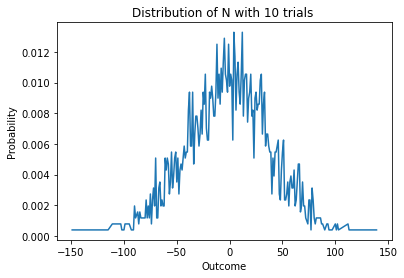

Number of trials = 10, Mean = -0.79140625, Variance = 1546.289301147461


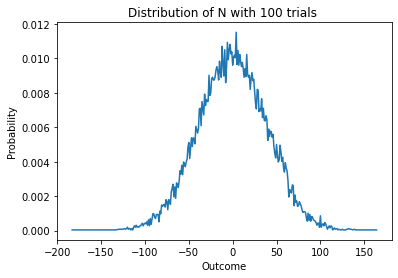

Number of trials = 100, Mean = -0.0008594757198109154, Variance = 1532.6754690429166


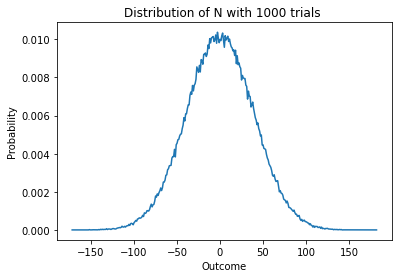

Number of trials = 1000, Mean = 0.05495200928172134, Variance = 1536.1483981221133


In [7]:
# MLWE with Kyber768 parameters
distribution("Kyber768")

In [ ]:
# MLWE with Kyber512 parameters
distribution("Kyber512")

In [ ]:
# MLWE with Kyber1024 parameters
distribution("Kyber1024")

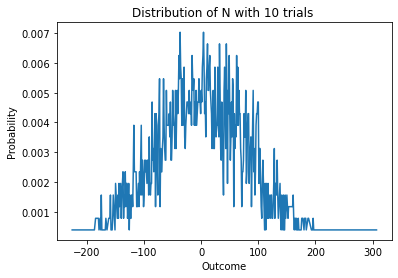

Number of trials = 10, Mean = 1.668359375, Variance = 6043.002905120849


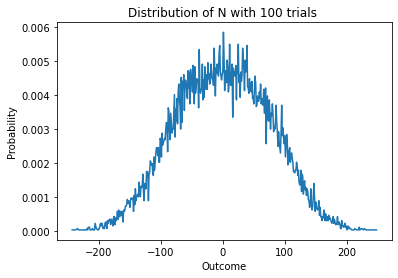

Number of trials = 100, Mean = -0.26064536291897805, Variance = 5793.888701232073


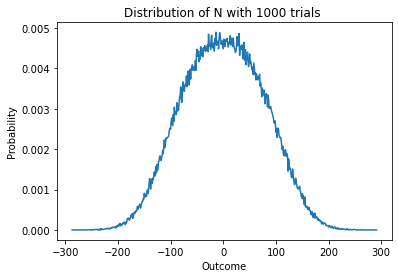

Number of trials = 1000, Mean = 0.061298072227973205, Variance = 5857.6309385364975


In [15]:
# with cv, cu in the error term
distribution("Kyber768", True)

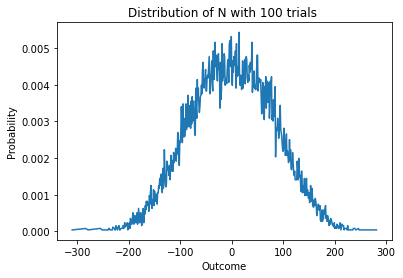

Number of trials = 100, Mean = 0.04543323697163841, Variance = 6581.364097239839


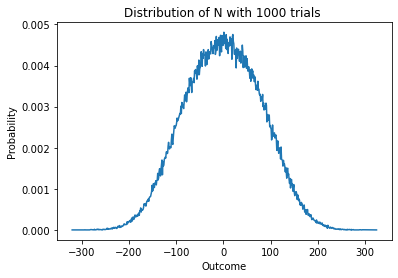

Number of trials = 1000, Mean = -0.0007148605045430752, Variance = 6595.738473828217


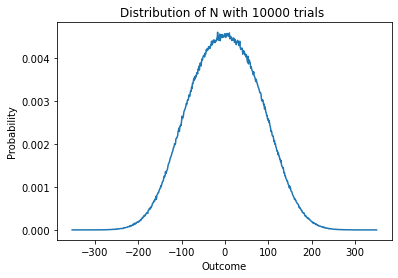

Number of trials = 10000, Mean = 0.13857018803816779, Variance = 6609.130995630366


In [8]:
# k=4
distribution("Kyber768", True, k=4)

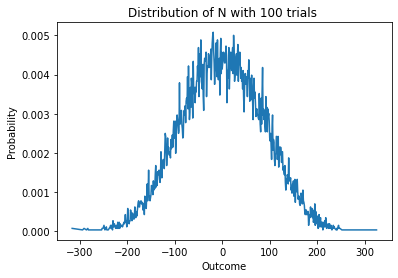

Number of trials = 100, Mean = 0.6266015625, Variance = 7394.782175169373


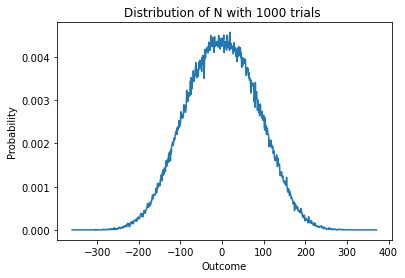

Number of trials = 1000, Mean = 0.0953452397693714, Variance = 7372.04164445299


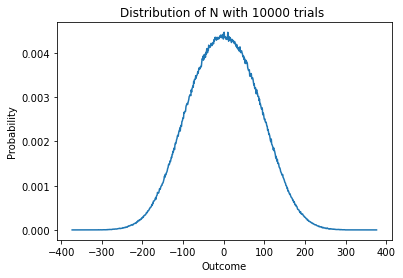

Number of trials = 10000, Mean = 0.09023787620437158, Variance = 7348.94364007416


In [9]:
distribution("Kyber768", True, k=5)

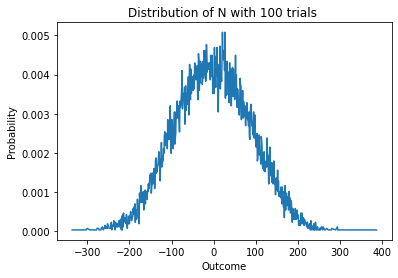

Number of trials = 100, Mean = -1.6447908121410992, Variance = 8168.821715022259


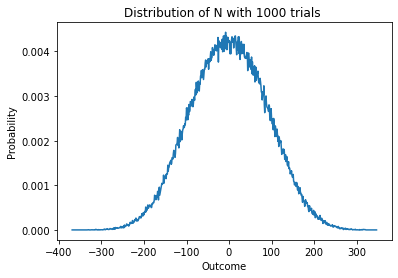

Number of trials = 1000, Mean = -0.09583111972249132, Variance = 8142.502894898946


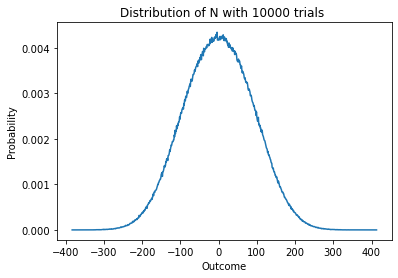

Number of trials = 10000, Mean = 0.08126090835652376, Variance = 8095.4018012360875


In [11]:
distribution("Kyber768", True, k=6)

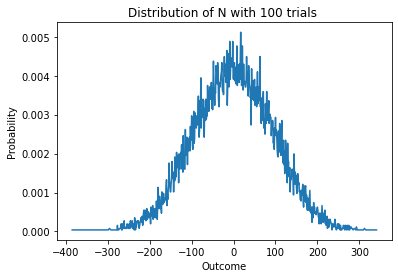

Number of trials = 100, Mean = 0.508046875, Variance = 8876.486341497803


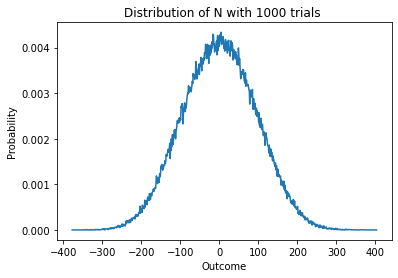

Number of trials = 1000, Mean = 0.5483860886821124, Variance = 8825.02550818074


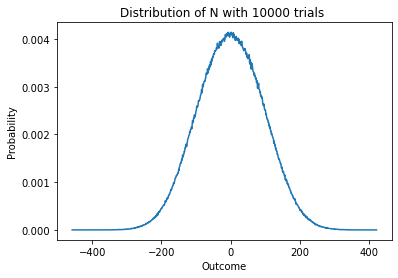

Number of trials = 10000, Mean = 0.05353860168455362, Variance = 8854.532418461757


In [12]:
distribution("Kyber768", True, k=7)

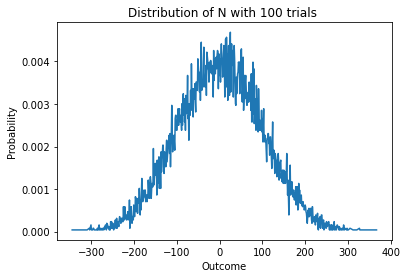

Number of trials = 100, Mean = 0.4871484375, Variance = 9627.506709837342


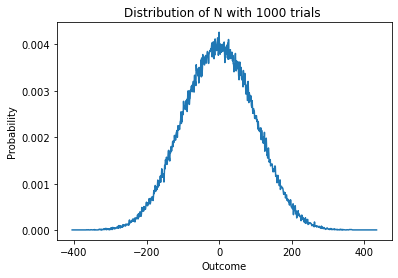

Number of trials = 1000, Mean = -0.1498310513877224, Variance = 9632.703682025793


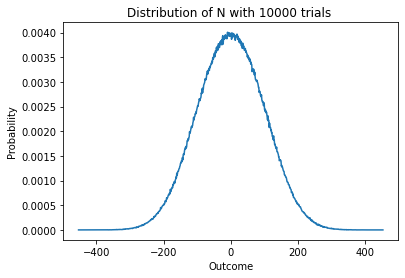

Number of trials = 10000, Mean = 0.0785623184782545, Variance = 9589.010131764331


In [13]:
distribution("Kyber768", True, k=8)

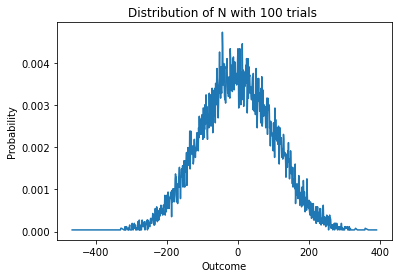

Number of trials = 100, Mean = -0.6514453125, Variance = 11153.829720567323


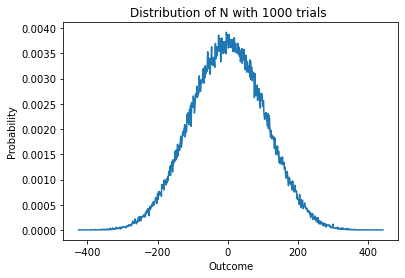

Number of trials = 1000, Mean = 0.1014269698473029, Variance = 11132.17186704816


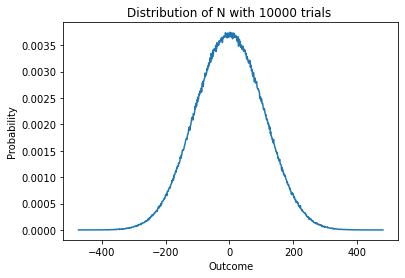

Number of trials = 10000, Mean = 0.07008131002302775, Variance = 11097.84287382496


In [14]:
distribution("Kyber768", True, k=10)

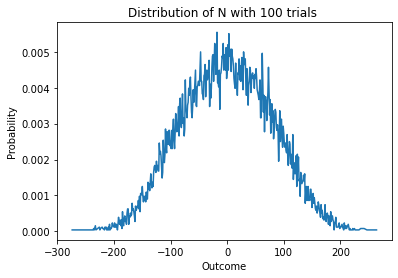

Number of trials = 100, Mean = -0.4580647681550061, Variance = 6275.2029662302675


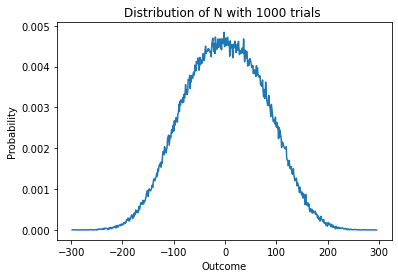

Number of trials = 1000, Mean = -0.2634288683070505, Variance = 6262.58918716785


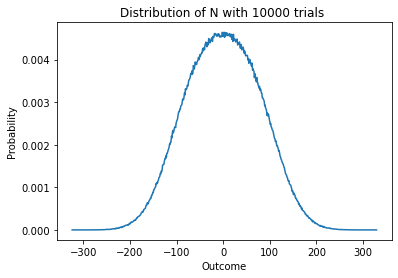

Number of trials = 10000, Mean = -0.02264104067535615, Variance = 6243.962070290073


In [15]:
distribution("Kyber512", True)

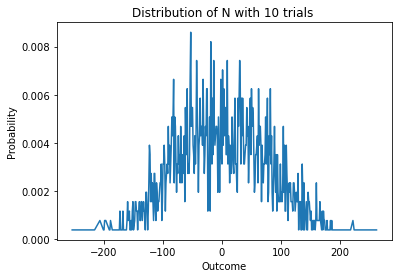

Number of trials = 10, Mean = 0.07890625, Variance = 6359.842992553711


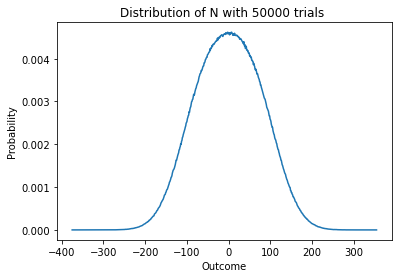

Number of trials = 50000, Mean = 0.035774987087669706, Variance = 6242.504998499905


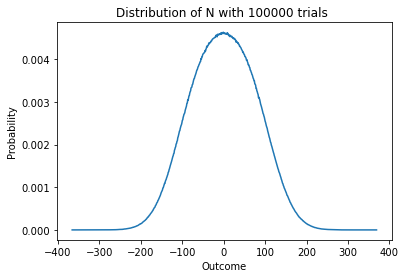

Number of trials = 100000, Mean = 0.007923862605182677, Variance = 6238.119326177269


In [18]:
distribution("Kyber512", True)

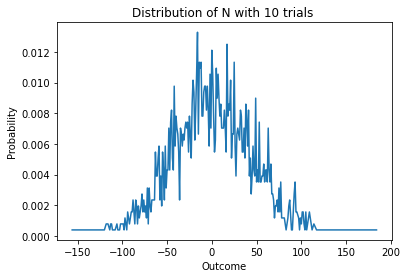

Number of trials = 10, Mean = 0.54375, Variance = 2003.7621484375


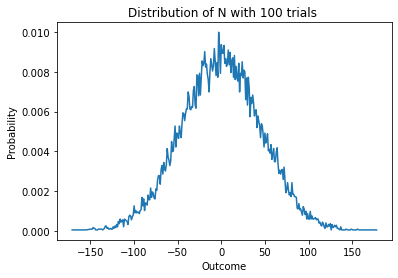

Number of trials = 100, Mean = 0.1032421875, Variance = 2081.0007082382203


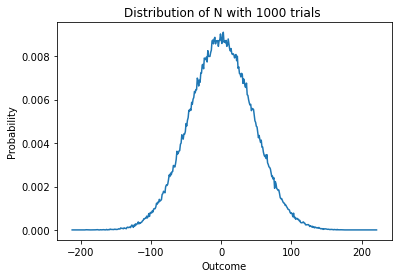

Number of trials = 1000, Mean = -0.005808797965553477, Variance = 2061.7790717732946


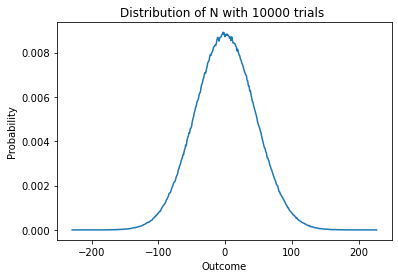

Number of trials = 10000, Mean = 0.041606997066326035, Variance = 2046.51897723654


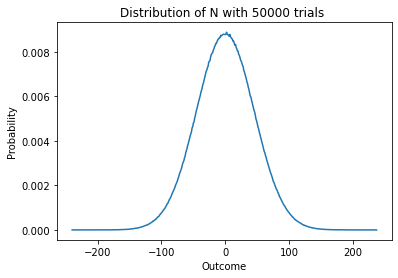

Number of trials = 50000, Mean = -0.008849052112169768, Variance = 2048.0521933226128


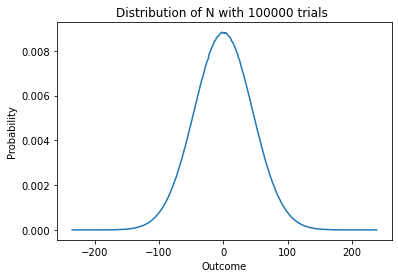

Number of trials = 100000, Mean = 0.00588563200610021, Variance = 2049.4119909680285


In [21]:
distribution("Kyber1024", True)

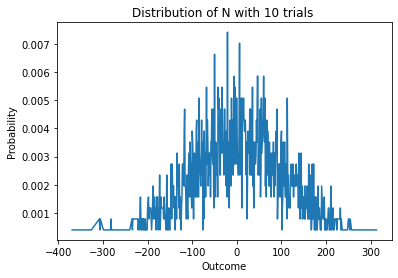

Number of trials = 10, Mean = 1.94453125, Variance = 11539.241454467774


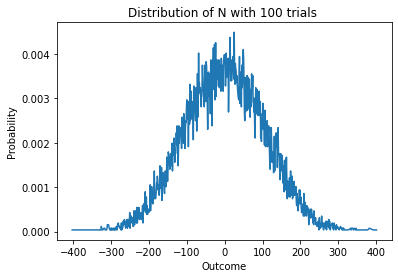

Number of trials = 100, Mean = 0.06078125, Variance = 11188.184352514649


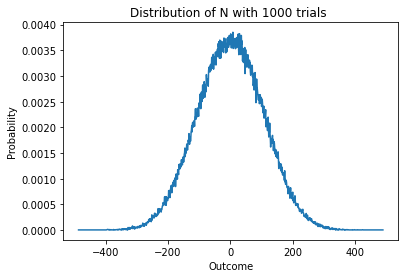

Number of trials = 1000, Mean = 0.035914763960233596, Variance = 11200.790467781246


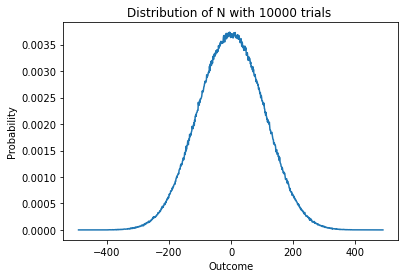

Number of trials = 10000, Mean = -0.020821345883485307, Variance = 11178.577342999319


In [51]:
distribution("test", True) 
#k=4 e1 = 3 e2 = 3 -> 9k
#k=4 e1 = 4 e2 = 3 -> 13k
#k=5 e1 = 3 e2 = 3 -> 11k
#k=5 e1 = 4 e2 = 3 -> 15k
#k=5 e1 = 4 e2 = 4 -> 16k
#k=5 e1 = 6 e2 = 4 -> 26k